## **Salifort_Motors_Employee_Retention**

### Capstone Project from Google Advanced Data Analytics Professional Certification Course

## Description

This project is to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.
Here,I have analyzed 15,000 Employee records which included variables such as monthly working hours,number of projects,department and salary.I performed EDA using Python packages and compared 4 different classification models such as Logistic Regression,Decision Tree,Random Forest and XGBoost.Then I evaluated the models using metrics such as accuracy,recall,precision,f1 score and confusion matrix.
Finally I summarized the results and presented the recommendations for Salifort's Human Resources team and Senior Leadership team with an Executive Summary. 

# **PACE stages**


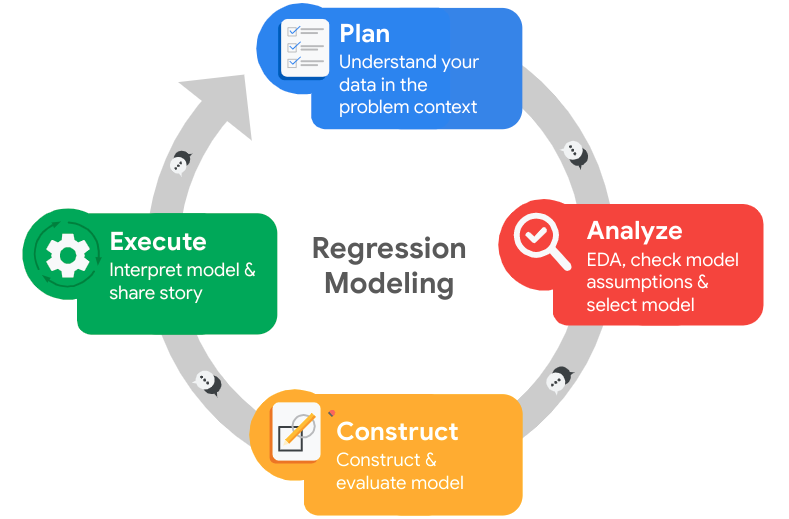

# **Pace: Plan**
 

### Step 1.Understanding the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to us and ask our team to provide data-driven suggestions based on our understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Our goal in this project is to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If we can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

#### Key Stakeholders:

* Senior Leadership team 
* Human Resources team

### About the HR dataset

The dataset that we'll be using for this project contains 14,999 rows and 10 columns for the variables listed below. 

Data source : [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

*   Import packages
*   Load dataset



In [4]:
!conda install -c conda-forge xgboost -y

Channels:
 - conda-forge
 - defaults
Platform: osx-64
Solving environment: done

# All requested packages already installed.



In [2]:
 !pip install xgboost

### Import packages

In [3]:
# Import packages
# Data Manipulation
import pandas as pd
import numpy as np
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Data Modeling
from xgboost import XGBClassifier,XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# Metrics
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,ConfusionMatrixDisplay,roc_curve,roc_auc_score,classification_report
from sklearn.tree import plot_tree
# Saving Models
import pickle
# For displaying all of the columns in dataframes
pd.set_option('display.max_columns',None)

### Load dataset

`Pandas` is used to read a dataset called **`HR_comma_sep.csv`.**

In [4]:
# Load dataset into a dataframe
df0 = pd.read_csv("/Users/shamilasaleem/Downloads/HR_comma_sep.csv")


# Display first 10 rows of the dataframe
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand the variables
- Clean the dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [5]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [6]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step,we rename the columns as needed. Standardize the column names so that they are all in `snake_case`, and correct any column names that are misspelled, and make column names more concise as needed.

In [7]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [8]:
# Rename columns as needed
df0 = df0.rename(columns = {'Work_accident':'work_accident',
                            'average_montly_hours':'average_monthly_hours',
                           'time_spend_company':'tenure',
                           'Department':'department'})

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [9]:
# Check for missing values
df0.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [10]:
# Check for duplicates
df0.duplicated().sum()

3008

In [11]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


In [12]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep = 'first').copy()

# Display first few rows of new dataframe as needed
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Lets begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
print(df1['left'].value_counts())

# Get percentages of people who left vs. stayed
print(df1['left'].value_counts(normalize = True))

left
0    10000
1     1991
Name: count, dtype: int64
left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


We see that the dataset is imbalanced with only 16.6% churn rate.This should be taken into account when evaluating our model.Accuracy alone would be misleading since a naive model predicting 'no churn' will still acheive an accuracy of 83%.Precision,recall and F1 scores can be used as primary evaluation metrics with particular attention to recall since missing employees who are likely to churn might be more costly in our situation.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)
* The purpose of performing Exploratory Data Analysis (EDA) before modeling is to gain a deep             understanding  of our data, identify potential issues like missing values, outliers, or incorrect       data types, and reveal patterns and relationships between variables.
* The Ethical considerations in this stage include protecting participant privacy and confidentiality     and considering potential harms when discussing sensitive topics.Essentially, handling data with        integrity and avoiding misrepresentation to uphold ethical research practices.

## Data visualizations

### Understanding the distribution of variables

=== Distribution of Satisfaction level ===


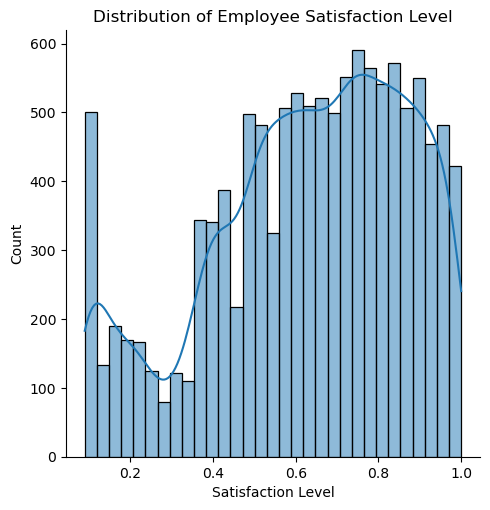

In [14]:
#Observing varaibles in our data
print("=== Distribution of Satisfaction level ===")
sns.displot(df1['satisfaction_level'],kde = True)
plt.title('Distribution of Employee Satisfaction Level')
plt.xlabel('Satisfaction Level')
plt.show()

The satisfaction level distribution shows a clear bimodal pattern with two distinct peaks.The first group consists of highly dissatisfied employees (around 500 employees) and the second group includes satisfied employees (around 550-600).Group 1 are likely high risk and they may need immediate intervention.


=== Distribution of Average Monthly Hours === 


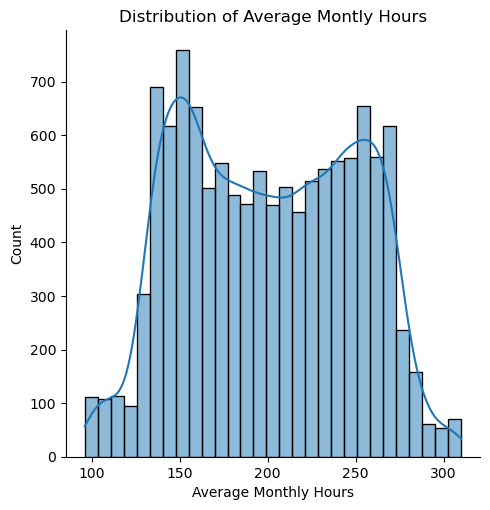

In [15]:
print("\n=== Distribution of Average Monthly Hours === ")
sns.displot(df1['average_monthly_hours'],kde= True)
plt.title('Distribution of Average Montly Hours')
plt.xlabel('Average Monthly Hours')
plt.show()


The distribution of average monthly hours reveals another bimodal pattern with two distinct employee populations.The first peak is centered around 150 hours per month representing standard full time employees , whereas the second peak is at 250 hours per month, revealing that the employees in this group work 50% more hours than the standard working time.

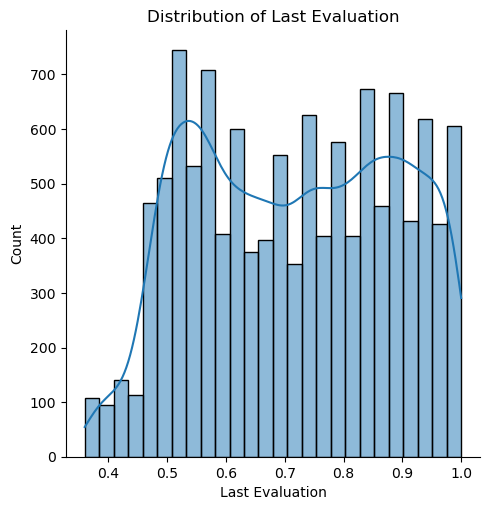

In [16]:
sns.displot(df1['last_evaluation'],kde = True)
plt.title('Distribution of Last Evaluation')
plt.xlabel('Last Evaluation')
plt.show()

From the distribution of last evaluation, we see yet another bimodal distribution. The Left peak is around 0.5 (approx 750 employees) and the right peak is around 0.8 to 0.9.This suggests that the company's evaluation system tends to segment employees into  two broad categories.

#### Boxplot

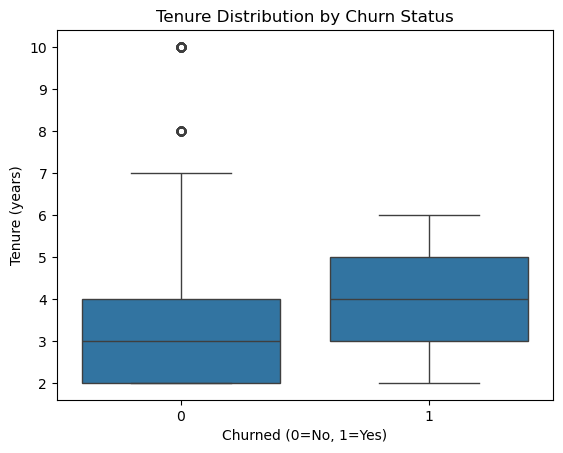

In [17]:
# Create a comparison boxplot to visualize distribution of `tenure` across target variable and to detect any outliers
sns.boxplot(x='left',y='tenure',data = df1)
plt.xlabel('Churned (0=No, 1=Yes)')
plt.ylabel('Tenure (years)')
plt.title('Tenure Distribution by Churn Status')
plt.show()

From the boxplot, we find that the employees who churned have a high median tenure (4 years) compared to 3 years for those who stayed. This finding is important and it reveals a mid-career retention problem.Employees in the 3-5 year range are at higher risk, and this may indicate a problem with not enough growth oppurtunities within the company.Further investigation may be needed.

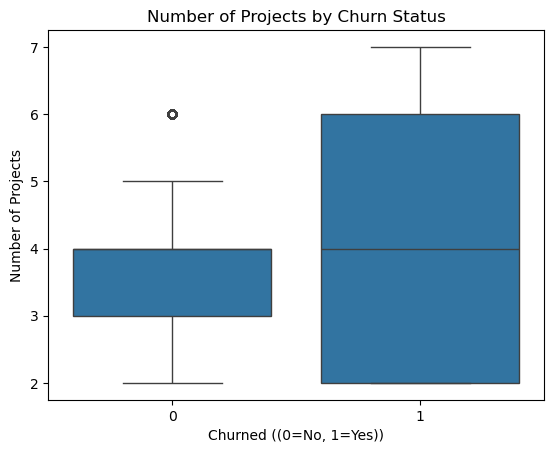

In [18]:
# Creating a boxplot to visualize the distribution of number of projects across the target variable
sns.boxplot(x='left',y='number_project',data=df1)
plt.xlabel('Churned ((0=No, 1=Yes))')
plt.ylabel('Number of Projects')
plt.title('Number of Projects by Churn Status')
plt.show()

Here both groups have similiar median project counts, churned employees show dramatically wider distribution compared to employees who stayed.This pattern also insists the presence of two distinct churn categories.Employees with too few projects are also leaving and those with many projects are also leaving.The 3-4 project range appears to be the optimal work load.

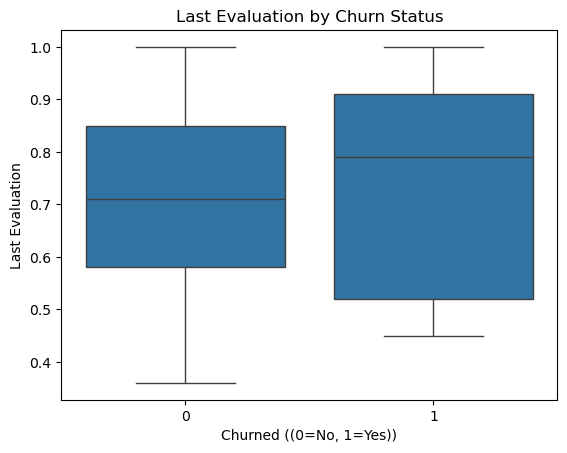

In [19]:
# Creating a boxplot to visualize the distribution of last_evaluation across the target variable
sns.boxplot(x='left',y='last_evaluation',data=df1)
plt.xlabel('Churned ((0=No, 1=Yes))')
plt.ylabel('Last Evaluation')
plt.title('Last Evaluation by Churn Status')
plt.show()

Here we can see that, churned employees have a higher median evaluation score compared to employees who stayed, indicating that the company is losing high performing talent.The churned group here also displays wider variability than the stayed group, suggesting two distinct churn populations.Low performers struggling in their roles and high performers leaving despite excellent evaluations.

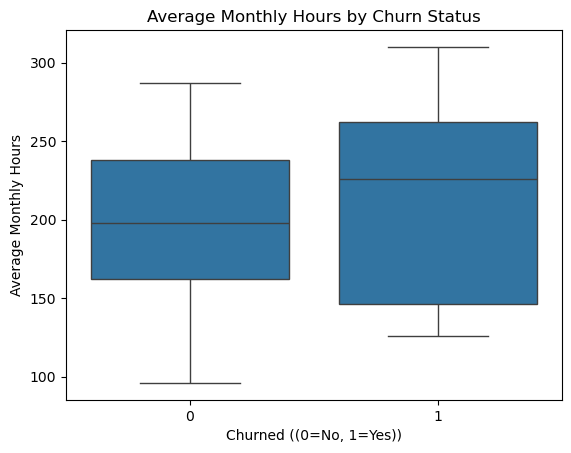

In [20]:
# Creating a boxplot to visualize the distribution of average_monthly_hours across the target variable
sns.boxplot(x='left',y='average_monthly_hours',data=df1)
plt.xlabel('Churned ((0=No, 1=Yes))')
plt.ylabel('Average Monthly Hours')
plt.title('Average Monthly Hours by Churn Status')
plt.show()

Churned employees are more widespread than retained employees, indicating churn occurs at both extremes of the workload spectrum.The churned group's wider spread reveals two distinct populations, disengaged employees working minimal hours and burned out employees working excessive hours.

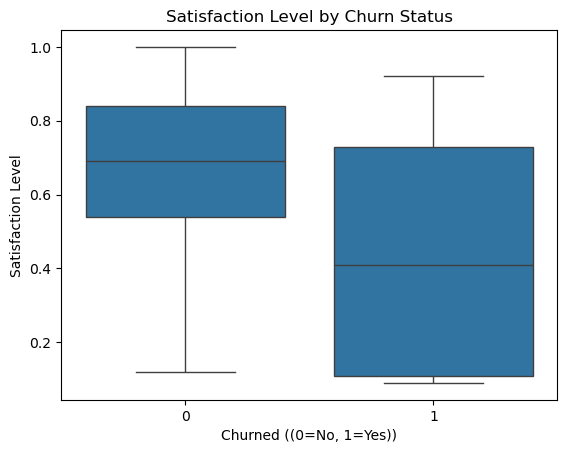

In [21]:
# Creating a boxplot to visualize the distribution of satisfaction_level across the target variable
sns.boxplot(x='left',y='satisfaction_level',data=df1)
plt.xlabel('Churned ((0=No, 1=Yes))')
plt.ylabel('Satisfaction Level')
plt.title('Satisfaction Level by Churn Status')
plt.show()

In [22]:
df1.groupby(['left'])['satisfaction_level'].agg(['mean','median'])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


Employees who churned had a median satisfaction level of  0.41, and the employees who stayed had a high median of satisfaction level of 0.69.This is as expected.The churned group tends to have a much wider distribution,with the top 25% of the churned employees having high satisfaction levels. This suggests that while low satisfaction is a clear warning sign, employees also leave for other reasons despite being satisfied.The factors may include career growth, promotions or competitive offers.

In [23]:
high_sat_churned = df1[(df1['left'] == 1) & (df1['satisfaction_level'] > 0.7)]
print(f"High satisfaction churners: {len(high_sat_churned)} out of {df1['left'].sum()} total churned.")
print("\nTheir characteristics:\n")
print(high_sat_churned[['satisfaction_level','tenure','promotion_last_5years','salary','number_project','average_monthly_hours']].describe())
df1['sat_category'] = pd.cut(df1['satisfaction_level'],bins=[0,0.4,0.7,1.0],labels=['Low','Medium','High'])
print("\nChurn rate by satisfaction category:")
print(df1.groupby('sat_category',observed=True)['left'].mean())

High satisfaction churners: 525 out of 1991 total churned.

Their characteristics:

       satisfaction_level      tenure  promotion_last_5years  number_project  \
count          525.000000  525.000000             525.000000      525.000000   
mean             0.818362    5.081905               0.003810        4.540952   
std              0.058417    0.661767               0.061662        0.621451   
min              0.710000    2.000000               0.000000        2.000000   
25%              0.770000    5.000000               0.000000        4.000000   
50%              0.820000    5.000000               0.000000        5.000000   
75%              0.870000    5.000000               0.000000        5.000000   
max              0.920000    6.000000               1.000000        6.000000   

       average_monthly_hours  
count             525.000000  
mean              243.822857  
std                24.939030  
min               128.000000  
25%               232.000000  
50%      

From our analysis, we can see that low satisfaction employees had 44% churn rate, about 4 times higher than medium or high satisfaction employees. Also, most of these employees are in the 4-6 year category.They are almost never getting promoted.Even though they are highly satisfied, working hard (243 hours/month),handling many projects, been in the company for around 5 years, they are still not getting promoted.This is clearly a career stagnation. Also they are overworked.So its safe to say that high satisfaction churners are frustrated high performers.This is a significant finding from our analysis.

Now lets compare this group to the high satisfaction employees who stayed to derive meaningful insights if any.

In [24]:
high_sat_stayed = df1[(df1['sat_category'] == 'High') & (df1['left'] == 0)]

print("High Satisfaction who STAYED:")
print(high_sat_stayed[['satisfaction_level','tenure','promotion_last_5years','number_project','average_monthly_hours']].describe())


High Satisfaction who STAYED:
       satisfaction_level       tenure  promotion_last_5years  number_project  \
count         4710.000000  4710.000000            4710.000000     4710.000000   
mean             0.850792     3.121019               0.020594        3.767091   
std              0.086538     1.254511               0.142037        0.894700   
min              0.710000     2.000000               0.000000        2.000000   
25%              0.770000     2.000000               0.000000        3.000000   
50%              0.850000     3.000000               0.000000        4.000000   
75%              0.930000     3.000000               0.000000        4.000000   
max              1.000000    10.000000               1.000000        6.000000   

       average_monthly_hours  
count            4710.000000  
mean              201.328875  
std                43.916177  
min                96.000000  
25%               164.000000  
50%               202.000000  
75%               239.0

In [25]:
print("\n======= KEY COMPARISONS =======")
print(f"\nPromotion Rate:")
print(f" Churned: {high_sat_churned['promotion_last_5years'].mean():.2%}")
print(f" Stayed: {high_sat_stayed['promotion_last_5years'].mean():.2%}")
print(f"\nAverage Tenure: ")
print(f" Churned: {high_sat_churned['tenure'].mean():.2f} years")
print(f" Stayed: {high_sat_stayed['tenure'].mean():.2f} years")
print(f"\nAverage Projects: ")
print(f" Churned: {high_sat_churned['number_project'].mean():.2f}")
print(f" Stayed: {high_sat_stayed['number_project'].mean():.2f}")
print(f"\nAverage Monthly hours: ")
print(f" Churned: {high_sat_churned['average_monthly_hours'].mean():.1f}")
print(f" Stayed: {high_sat_stayed['average_monthly_hours'].mean():.1f}")


======= KEY COMPARISONS =======

Promotion Rate:
 Churned: 0.38%
 Stayed: 2.06%

Average Tenure: 
 Churned: 5.08 years
 Stayed: 3.12 years

Average Projects: 
 Churned: 4.54
 Stayed: 3.77

Average Monthly hours: 
 Churned: 243.8
 Stayed: 201.3


Employees who churned despite high satisfaction had a median tenure of 5 years compared to 3 years for those who stayed.They were handling 20% more projects and handling 42 additional hours per month.Yet their promotion rate was 0.38% compared to 2.06% for those who stayed, and even this rate is incredibly low.This finding is critical because it shows that satisfaction with day to day work is necessary but not sufficient for retention.For mid career employees, career progression and work load balance matter more.This finding can lead to clear actionable insights.

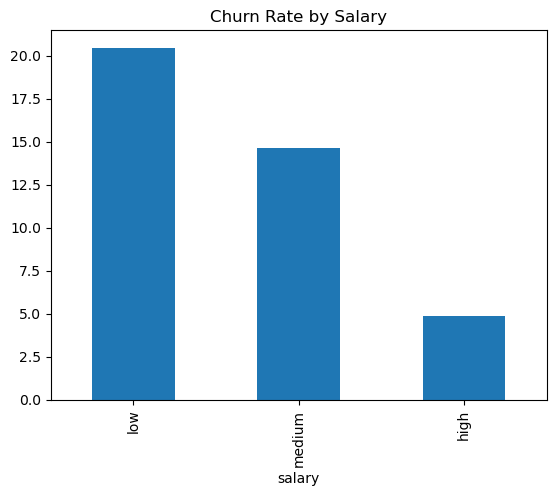

salary
low       20.452962
medium    14.616993
high       4.848485
Name: left, dtype: float64


In [26]:
churn_by_salary = df1.groupby('salary')['left'].mean() * 100
salary_order = ['low','medium','high']
churn_by_salary = churn_by_salary.reindex(salary_order)
churn_by_salary.plot(kind='bar')
plt.title('Churn Rate by Salary')
plt.show()
print(churn_by_salary)

Salary shows a strong inverse relationship with churn.Low salary employees have a churn rate of 20.45%, 4 times higher than high salary employees at 4.8%.This creates a clear connection.As compensation increases, churn decreases.

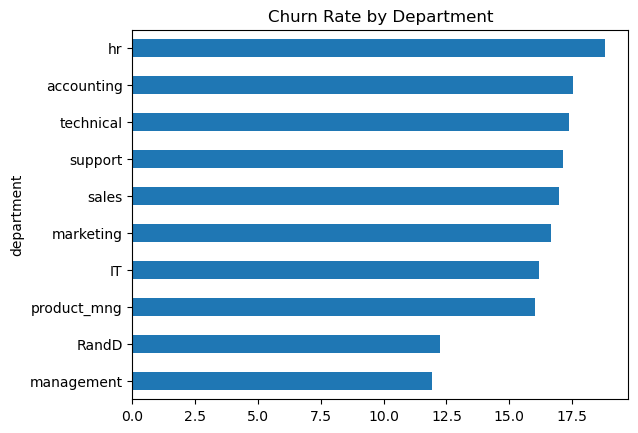

department
hr             18.801997
accounting     17.552335
technical      17.379679
support        17.133443
sales          16.980550
marketing      16.641902
IT             16.188525
product_mng    16.034985
RandD          12.247839
management     11.926606
Name: left, dtype: float64


In [27]:
churn_by_dept = df1.groupby('department')['left'].mean() * 100
churn_by_dept.sort_values().plot(kind='barh')
plt.title('Churn Rate by Department')
plt.show()
print(churn_by_dept.sort_values(ascending=False))

Department has little to moderate impact with respect to churn rate.Management has the lowest churn rate and HR has the highest, while most other departments cluster around the average 16.6%.The proportion of employees who left the company doesn't seem to follow any specific pattern across various deparments.

work_accident
0    18.597771
1     5.675676
Name: left, dtype: float64


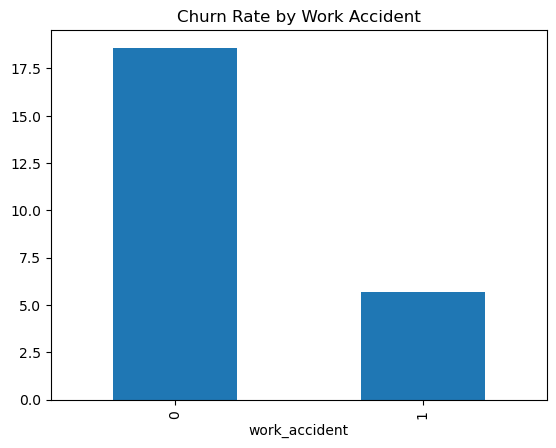

In [28]:
churn_by_accident = df1.groupby('work_accident')['left'].mean() * 100
print(churn_by_accident)
churn_by_accident.plot(kind='bar')
plt.title('Churn Rate by Work Accident')
plt.show()

Work accidents show inverse relationship with churn rate.Employees who experienced work accidents have only a 5.7% churn rate compared to 18.6% for those without accidents.

### Insights
Exploratory analysis revealed three tiers of predictive features,Strong predictors include satisfaction level, salary and work accidents.Moderate predictors include average monthly hours,number of projects and department.Weak predictors include promotion history, last evaluation and tenure.Notably,churned employees show wider variability across features rather than consistently poor metrics, revealing two distinct churn profiles.They can be grouped as disengaged underperformers and burned out high performers.

### Feature Engineering

In [29]:
# Encode categorical Variables
# Converting 'department' to numerical format using one-hot encoding

df_encoded = pd.get_dummies(df1,columns=['department'],drop_first=True)
print(f"Original shape: {df1.shape}, New shape: {df_encoded.shape}")

Original shape: (11991, 11), New shape: (11991, 19)


In [30]:
# Converting 'salary' to numerical format using Ordinal Encoding 
from sklearn.preprocessing import OrdinalEncoder
salary_order = ['low','medium','high']
ordinal_encoder = OrdinalEncoder(categories=[salary_order])
df_encoded[['salary_encoded']] = ordinal_encoder.fit_transform(df_encoded[['salary']])

In [31]:
df_encoded = df_encoded.drop(columns = ['salary','sat_category'])

In [32]:
print(df_encoded['salary_encoded'].value_counts().sort_index())

salary_encoded
0.0    5740
1.0    5261
2.0     990
Name: count, dtype: int64


In [33]:
# Creating Engineered features
# Workload - Combination of number of projects and average monthly hours
df_encoded['workload_intensity'] = df_encoded['number_project'] * df_encoded['average_monthly_hours']
# Performance - Satisfaction gap
df_encoded['eval_satisfaction_gap'] = df_encoded['last_evaluation'] - df_encoded['satisfaction_level']
# Hours per project
df_encoded['hours_per_project'] = df_encoded['average_monthly_hours']/(df_encoded['number_project'] + 0.1)

In [34]:
df_encoded.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_encoded,workload_intensity,eval_satisfaction_gap,hours_per_project
0,0.38,0.53,2,157,3,0,1,0,False,False,False,False,False,False,True,False,False,0.0,314,0.15,74.761905
1,0.80,0.86,5,262,6,0,1,0,False,False,False,False,False,False,True,False,False,1.0,1310,0.06,51.372549
2,0.11,0.88,7,272,4,0,1,0,False,False,False,False,False,False,True,False,False,1.0,1904,0.77,38.309859
3,0.72,0.87,5,223,5,0,1,0,False,False,False,False,False,False,True,False,False,0.0,1115,0.15,43.725490
4,0.37,0.52,2,159,3,0,1,0,False,False,False,False,False,False,True,False,False,0.0,318,0.15,75.714286


In [35]:
new_features = ['workload_intensity','eval_satisfaction_gap','hours_per_project']
print(df_encoded[new_features].describe())

       workload_intensity  eval_satisfaction_gap  hours_per_project
count        11991.000000           11991.000000       11991.000000
mean           781.160620               0.087024          55.029555
std            354.720302               0.280586          18.312435
min            192.000000              -0.620000          15.901639
25%            534.000000              -0.100000          42.352941
50%            728.000000               0.070000          52.258065
75%            988.000000               0.230000          65.483871
max           2170.000000               0.890000         147.619048


#### Correlation analysis
We are analyzing how features relate to each other and to churn.

In [36]:
for feature in new_features:
    corr = df_encoded[[feature,'left']].corr().iloc[0,1]
    print(f" {feature}:{corr:.3f}")

 workload_intensity:0.156
 eval_satisfaction_gap:0.309
 hours_per_project:0.063



 Features most correlated with Churn:


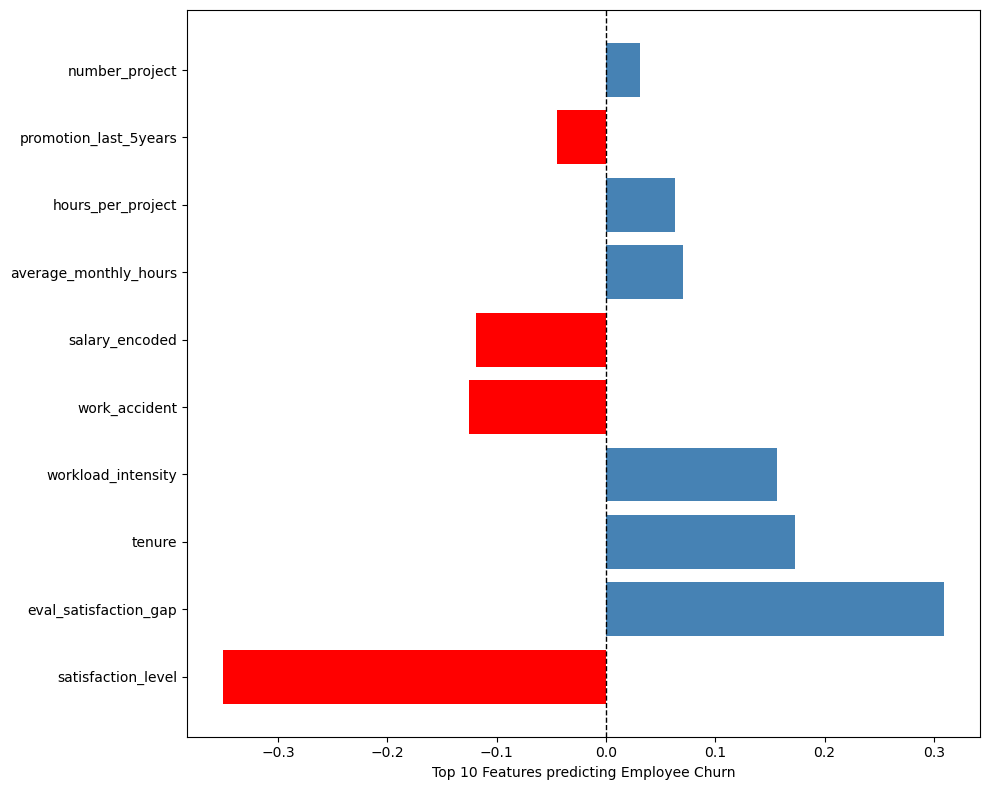

In [37]:
#Creating a heatmap for correlation analysis
print("\n Features most correlated with Churn:")
correlation_matrix = df_encoded.corr()
correlation_with_churn = correlation_matrix['left'].sort_values(ascending=False)
top_10_abs = correlation_with_churn[1:].abs().sort_values(ascending=False)[:10]
top_10 = correlation_with_churn[top_10_abs.index]
plt.figure(figsize=(10,8))
colors = ['red' if x<0 else 'steelblue' for x in top_10.values]
plt.barh(top_10.index, top_10.values,color=colors)
plt.xlabel('Top 10 Features predicting Employee Churn')
plt.axvline(x=0,color='black',linestyle='--',linewidth=1)
plt.tight_layout()
plt.show()

Our Correlation analysis reveals several key insights about employee churn.We can see the top 10 strongest predictors of churn.

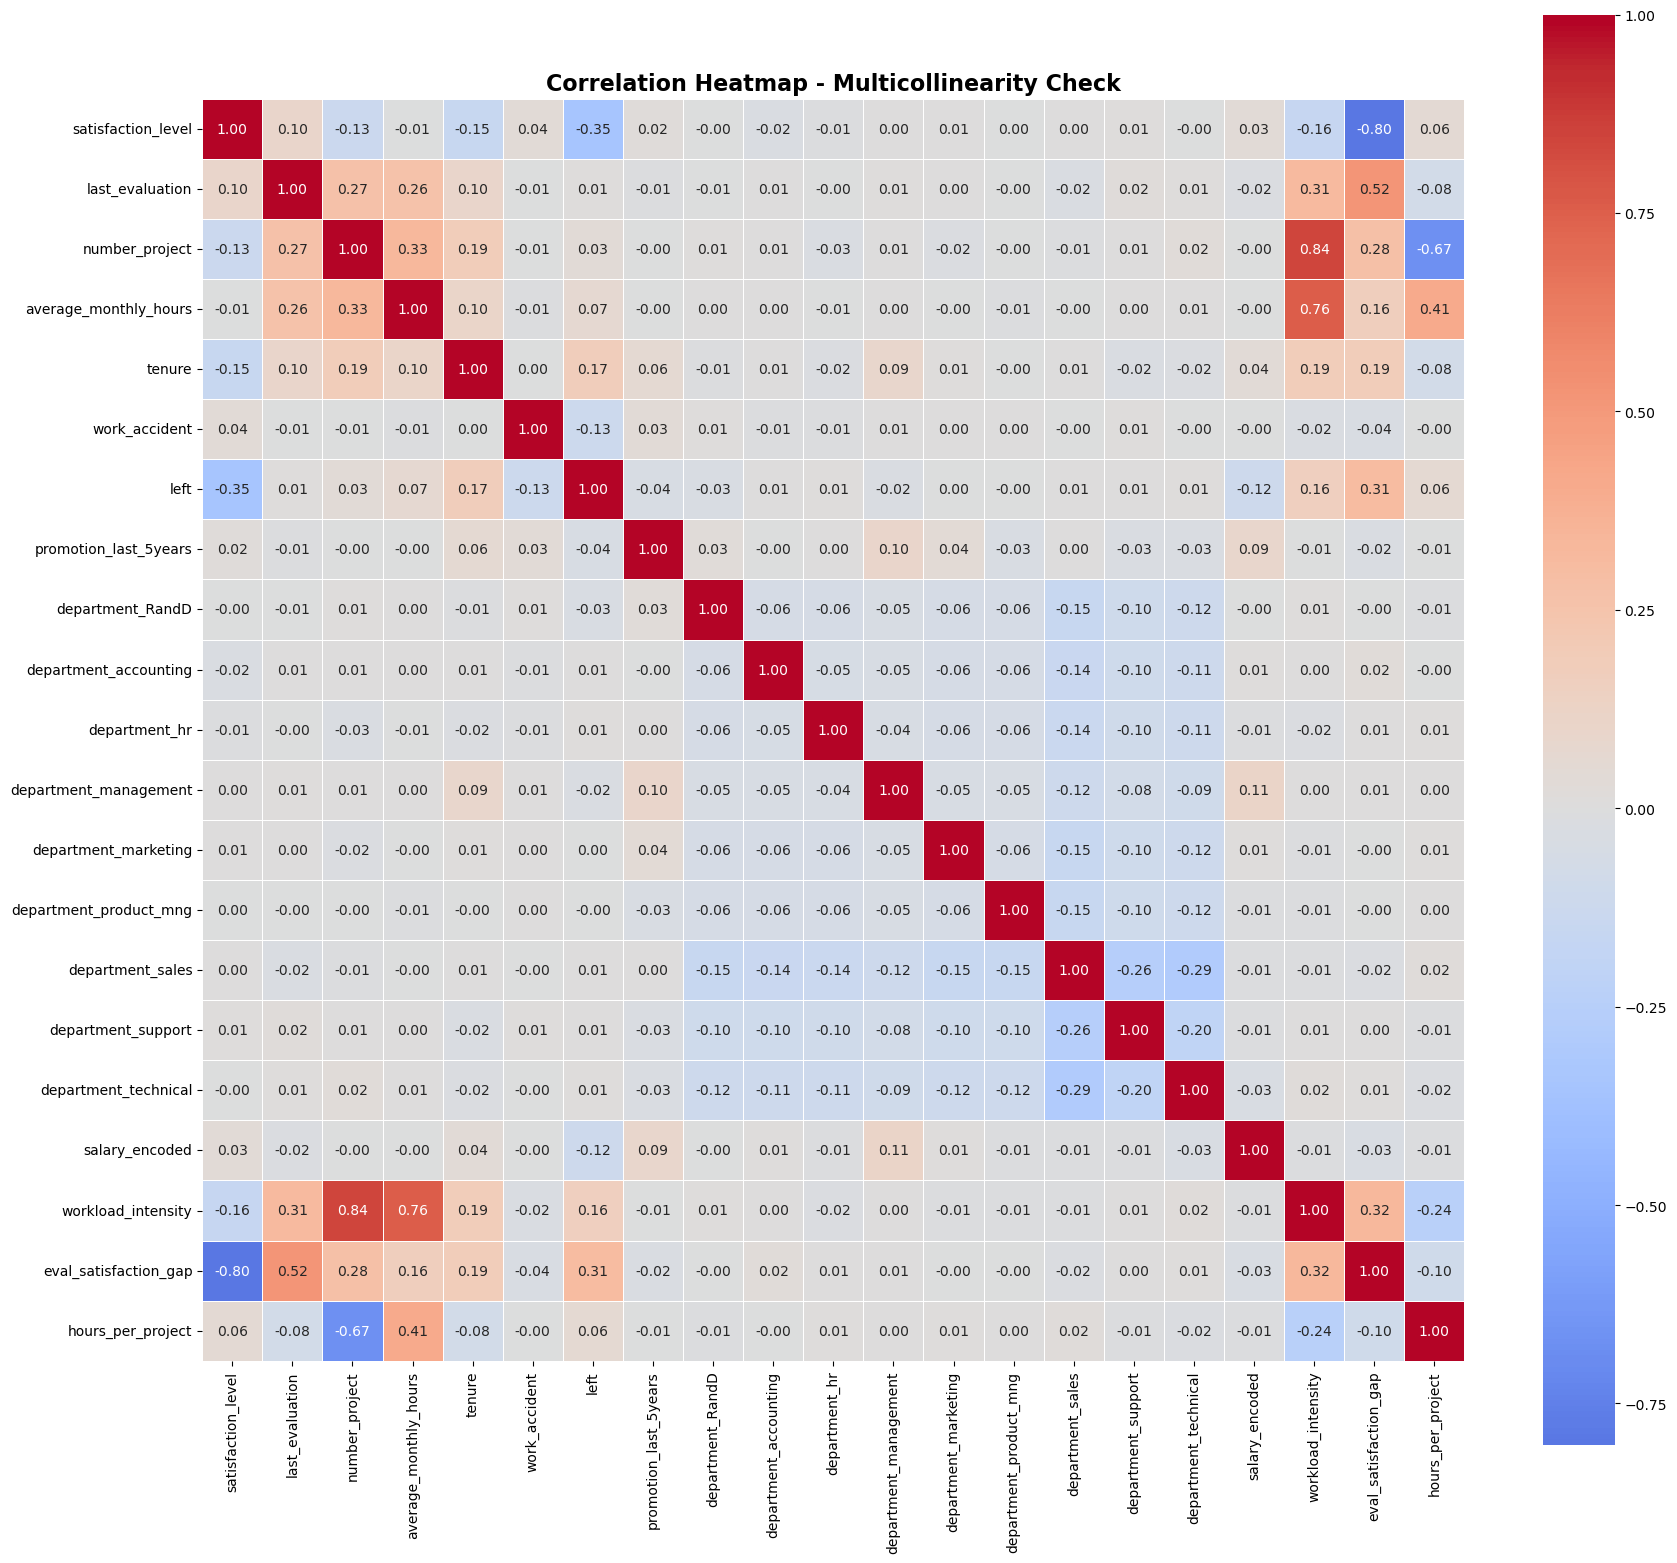

In [38]:
plt.figure(figsize=(18,16))
sns.heatmap(correlation_matrix,
            annot=True,
            fmt='.2f',
           cmap='coolwarm',
           center=0,
           square=True,
           linewidth=0.5,)
plt.title('Correlation Heatmap - Multicollinearity Check', fontsize=16,fontweight='bold')
plt.tight_layout()
plt.show()


In [39]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_processed = df_encoded.copy()
numerical_columns = ['satisfaction_level','last_evaluation','number_project','average_monthly_hours','tenure','workload_intensity','eval_satisfaction_gap','hours_per_project','salary_encoded']
df_processed[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])
print(f"Scaled {len(numerical_columns)} numerical features")

Scaled 9 numerical features


In [40]:
#Check to confirm scaling 
print(df_processed[numerical_columns].describe().loc[['mean','std']].round(3))

      satisfaction_level  last_evaluation  number_project  \
mean                -0.0             -0.0             0.0   
std                  1.0              1.0             1.0   

      average_monthly_hours  tenure  workload_intensity  \
mean                   -0.0     0.0                 0.0   
std                     1.0     1.0                 1.0   

      eval_satisfaction_gap  hours_per_project  salary_encoded  
mean                    0.0               -0.0             0.0  
std                     1.0                1.0             1.0  


In [41]:
df_processed.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_encoded,workload_intensity,eval_satisfaction_gap,hours_per_project
0,-1.035668,-1.108990,-1.549921,-0.892208,-0.274291,0,1,0,False,False,False,False,False,False,True,False,False,-0.949670,-1.317038,0.224453,1.077583
1,0.706637,0.851380,1.029194,1.262709,1.981036,0,1,0,False,False,False,False,False,False,True,False,False,0.622971,1.490925,-0.096318,-0.199709
2,-2.155721,0.970190,2.748604,1.467939,0.477485,0,1,0,False,False,False,False,False,False,True,False,False,0.622971,3.165554,2.434210,-0.913062
3,0.374770,0.910785,1.029194,0.462311,1.229261,0,1,0,False,False,False,False,False,False,True,False,False,-0.949670,0.941173,0.224453,-0.617315
4,-1.077151,-1.168396,-1.549921,-0.851162,-0.274291,0,1,0,False,False,False,False,False,False,True,False,False,-0.949670,-1.305761,0.224453,1.129593


Now we are ready to move on to the nect phase of our PACE strategy.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


Logistic regression is a popular and powerful choice for binary classification tasks, especially when interpretability, efficiency, and simplicity are key considerations.


## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





### Identify the type of prediction task.

Our goal is to predict whether an employee leaves the company,which a categorical outcome variable.This involves binary classification.Our outcome variable is either 0(stayed) or 1(left).

Now we split the data into training and testing sets and then fit the data to the model.

In [42]:
from imblearn.over_sampling import SMOTE

In [43]:
X = df_processed.drop('left',axis=1)
y = df_processed['left']

In [44]:
#Split the data into training and testing set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,stratify = y,random_state = 42)

In [45]:
print(f"\n After Split:")
print(f"  Training set: {X_train.shape[0]:,} samples")
print(f"    - Stayed: {(y_train == 0).sum():,}")
print(f"    - Left: {(y_train == 1).sum():,}")
print(f"  Test set: {X_test.shape[0]:,} samples")
print(f"    - Stayed: {(y_test == 0).sum():,}")
print(f"    - Left: {(y_test == 1).sum():,}")


 After Split:
  Training set: 8,993 samples
    - Stayed: 7,500
    - Left: 1,493
  Test set: 2,998 samples
    - Stayed: 2,500
    - Left: 498


In [46]:
print("\n Applying Smote...")
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


 Applying Smote...


In [47]:
print(f"\nAfter SMOTE:")
print(f"  Training samples: {X_train_balanced.shape[0]:,}")
print(f"    - Stayed: {(y_train_balanced == 0).sum():,}")
print(f"    - Left: {(y_train_balanced == 1).sum():,}")



After SMOTE:
  Training samples: 15,000
    - Stayed: 7,500
    - Left: 7,500


## Step 3. Model Building

Once we have the training and testing data ready, we begin by building models.We will train 3 different models and compare their performance.

### 1.Logistic Regression

Logistic regression is a popular and powerful choice for binary classification tasks, especially when interpretability, efficiency, and simplicity are key considerations.

In [48]:
log_reg = LogisticRegression(max_iter=1000,random_state=42)
log_reg.fit(X_train_balanced,y_train_balanced)

LogisticRegression(max_iter=1000, random_state=42)

In [49]:
y_pred_lr = log_reg.predict(X_test)
y_pred_proba_lr = log_reg.predict_proba(X_test)[:,1]

#### 2.Random Forest

Random Forest is an ensemble machine learning algorithm that builds many decision trees and combines their predictions to produce a more accurate and stable result. Each tree is trained on a random subset of the data and features, which reduces overfitting and improves generalization. Because of this, Random Forest is powerful, easy to use, and works well even when the data contains noise or complex relationships.It can be used for classification and regression tasks.
In our case, it is a strong choice because it can capture non-linear patterns in employee behaviour.

In [50]:
print("\nModel 2: Random Forest")
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=1,
    max_depth=None,
    min_samples_split=2
)
rf_model.fit(X_train_balanced,y_train_balanced)


Model 2: Random Forest


RandomForestClassifier(n_jobs=1, random_state=42)

In [51]:
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:,1]

### 3.XGBoost
XGBoost (Extreme Gradient Boosting) is a powerful boosting algorithm that builds trees sequentially with each new tree correcting errors made by the previous ones. It includes regularization, handles missing values, and is optimized for performance, making it one of the most accurate and widely used machine learning methods.XGBoost is particularly strong for churn prediction because it captures complex patterns and interactions between employee features, often outperforming simpler models.

In [52]:
%%time
xgb_model = XGBClassifier(
    n_estimators = 100,
    learning_rate=0.1,
    max_depth=6,
    random_state = 42,
    eval_metric='logloss',
    n_jobs=-1
)
xgb_model.fit(X_train_balanced, y_train_balanced)
print("Model fitted")

Model fitted
CPU times: user 873 ms, sys: 39.2 ms, total: 912 ms
Wall time: 144 ms


In [53]:
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# PacE: Execute Stage

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders

### Logistic Regression results

#### Confusion matrix 

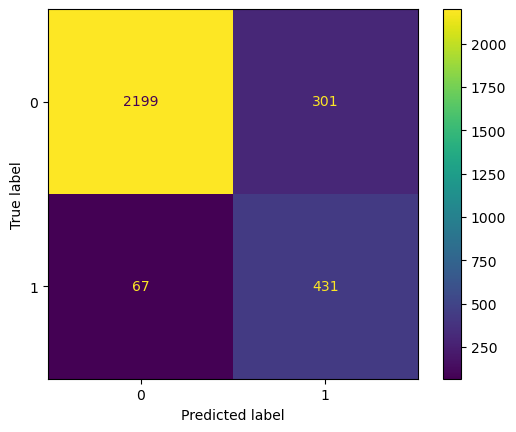

In [54]:
cm_lr= confusion_matrix(y_test,y_pred_lr,labels = log_reg.classes_)
tn, fp, fn, tp = cm_lr.ravel()
cm_lr_disp = ConfusionMatrixDisplay(confusion_matrix = cm_lr,display_labels = log_reg.classes_)
cm_lr_disp.plot(values_format='')
plt.show()

In [55]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
print("\nPERFORMANCE METRICS:")
print(f"  Accuracy:  {accuracy_lr:.4f} (How often is the model correct overall?)")
print(f"  Precision: {precision_lr:.4f} (Of predicted 'will leave', how many actually left?)")
print(f"  Recall:    {recall_lr:.4f} (Of actual leavers, how many did we catch?)")
print(f"  F1-Score:  {f1_lr:.4f} (Balanced score)")
print(f"  ROC-AUC:   {roc_auc_lr:.4f} (Overall ability to distinguish classes)")



PERFORMANCE METRICS:
  Accuracy:  0.8773 (How often is the model correct overall?)
  Precision: 0.5888 (Of predicted 'will leave', how many actually left?)
  Recall:    0.8655 (Of actual leavers, how many did we catch?)
  F1-Score:  0.7008 (Balanced score)
  ROC-AUC:   0.9163 (Overall ability to distinguish classes)


#### Classification Report

In [56]:
print("\nDETAILED CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred_lr, target_names=['Stayed', 'Left']))


DETAILED CLASSIFICATION REPORT:
              precision    recall  f1-score   support

      Stayed       0.97      0.88      0.92      2500
        Left       0.59      0.87      0.70       498

    accuracy                           0.88      2998
   macro avg       0.78      0.87      0.81      2998
weighted avg       0.91      0.88      0.89      2998



In [57]:
# Interpreting the results of Logistic Regression
print("\n INTERPRETATION:")
print(f"  • Model correctly identified {tp} out of {tp+fn} employees who left ({recall_lr:.1%})")
print(f"  • Missed {fn} employees who left (failed to catch them)")
print(f"  • Had {fp} false alarms (predicted 'leave' but they stayed)")
print(f"  • Overall accuracy: {accuracy_lr:.1%}")

print("\n" + "="*60)
print("LOGISTIC REGRESSION SUMMARY")
print("="*60)
print(f"Key Metrics:")
print(f"  • Recall: {recall_lr:.4f}")
print(f"  • Precision: {precision_lr:.4f}")
print(f"  • ROC-AUC: {roc_auc_lr:.4f}")
print(f"\nKey Finding: Baseline performance established")
print(f"  - Caught {recall_lr:.1%} of employees who left")
print("="*60)


 INTERPRETATION:
  • Model correctly identified 431 out of 498 employees who left (86.5%)
  • Missed 67 employees who left (failed to catch them)
  • Had 301 false alarms (predicted 'leave' but they stayed)
  • Overall accuracy: 87.7%

LOGISTIC REGRESSION SUMMARY
Key Metrics:
  • Recall: 0.8655
  • Precision: 0.5888
  • ROC-AUC: 0.9163

Key Finding: Baseline performance established
  - Caught 86.5% of employees who left


### Random Forest Results

#### Confusion matrix 

In [58]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

In [59]:
print("\nPERFORMANCE METRICS:")
print(f"  Accuracy:  {accuracy_rf:.4f}")
print(f"  Precision: {precision_rf:.4f}")
print(f"  Recall:    {recall_rf:.4f}")
print(f"  F1-Score:  {f1_rf:.4f}")
print(f"  ROC-AUC:   {roc_auc_rf:.4f}")



PERFORMANCE METRICS:
  Accuracy:  0.9840
  Precision: 0.9787
  Recall:    0.9237
  F1-Score:  0.9504
  ROC-AUC:   0.9765


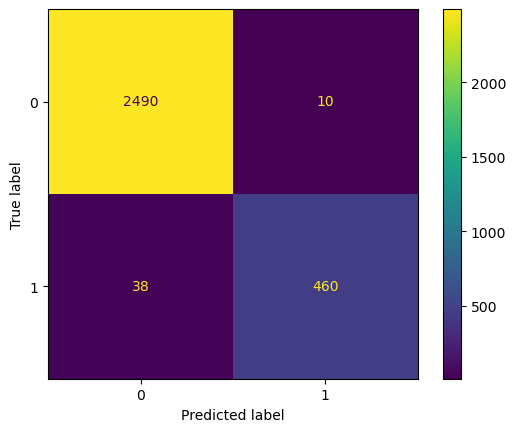

In [60]:
cm_rf = confusion_matrix(y_test,y_pred_rf)
tn_rf, fp_rf, fn_rf, tp_rf = cm_rf.ravel()
cm_rf_disp = ConfusionMatrixDisplay(confusion_matrix = cm_rf)
cm_rf_disp.plot()

#### Classification Report

In [61]:
print("\nDETAILED CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred_rf, target_names=['Stayed', 'Left']))


DETAILED CLASSIFICATION REPORT:
              precision    recall  f1-score   support

      Stayed       0.98      1.00      0.99      2500
        Left       0.98      0.92      0.95       498

    accuracy                           0.98      2998
   macro avg       0.98      0.96      0.97      2998
weighted avg       0.98      0.98      0.98      2998



In [62]:
print("\nINTERPRETATION:")
print(f"  • Model correctly identified {tp_rf} out of {tp_rf+fn_rf} employees who left ({recall_rf:.1%})")
print(f"  • Missed {fn_rf} employees who left")
print(f"  • Had {fp_rf} false alarms")
print(f"  • Improvement: Caught {tp_rf - tp} MORE leavers than Logistic Regression")
print(f"  • Improvement: {fn - fn_rf} FEWER missed leavers")

print("\n" + "="*60)
print("RANDOM FOREST SUMMARY")
print("="*60)
print(f"Key Metrics:")
print(f"  • Recall: {recall_rf:.4f} ({recall_rf:.1%})")
print(f"  • Precision: {precision_rf:.4f}")
print(f"  • ROC-AUC: {roc_auc_rf:.4f}")
print(f"\nPerformance vs Logistic Regression:")
print(f"  • Recall improvement: {(recall_rf-recall_lr)*100:+.1f} percentage points")
print(f"  • Caught {tp_rf} leavers (vs {tp})")
print(f"  • Missed {fn_rf} leavers (vs {fn})")


INTERPRETATION:
  • Model correctly identified 460 out of 498 employees who left (92.4%)
  • Missed 38 employees who left
  • Had 10 false alarms
  • Improvement: Caught 29 MORE leavers than Logistic Regression
  • Improvement: 29 FEWER missed leavers

RANDOM FOREST SUMMARY
Key Metrics:
  • Recall: 0.9237 (92.4%)
  • Precision: 0.9787
  • ROC-AUC: 0.9765

Performance vs Logistic Regression:
  • Recall improvement: +5.8 percentage points
  • Caught 460 leavers (vs 431)
  • Missed 38 leavers (vs 67)


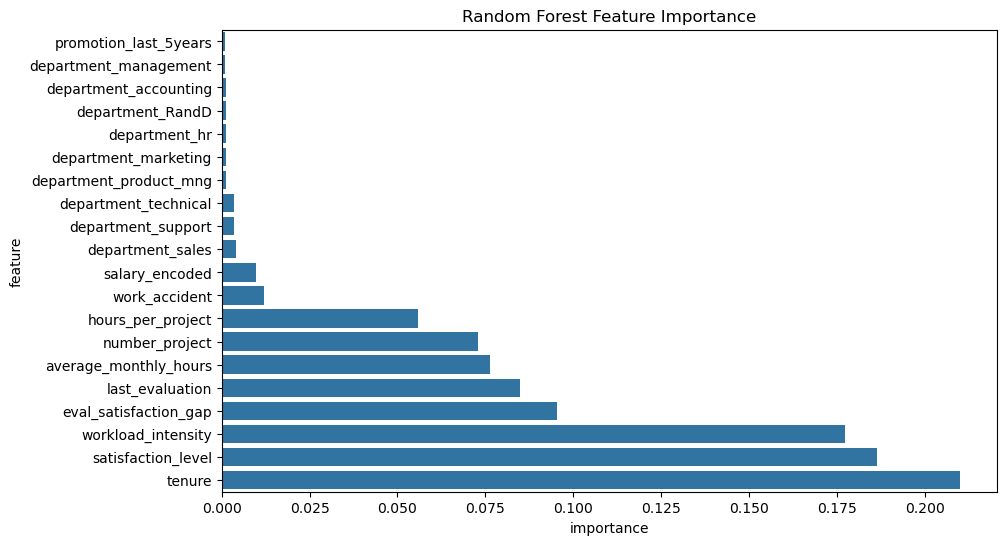

In [63]:
feat_imp = pd.DataFrame({
    'feature': X_train_balanced.columns,
    'importance': rf_model.feature_importances_
})

feat_imp = feat_imp.sort_values('importance')

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feat_imp)
plt.title("Random Forest Feature Importance")
plt.show()

In [64]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
print("\n PERFORMANCE METRICS:")
print(f"  Accuracy:  {accuracy_xgb:.4f}")
print(f"  Precision: {precision_xgb:.4f}")
print(f"  Recall:    {recall_xgb:.4f}")
print(f"  F1-Score:  {f1_xgb:.4f}")
print(f"  ROC-AUC:   {roc_auc_xgb:.4f}")


 PERFORMANCE METRICS:
  Accuracy:  0.9810
  Precision: 0.9546
  Recall:    0.9297
  F1-Score:  0.9420
  ROC-AUC:   0.9819


### XGBoost Results

#### Classification Matrix

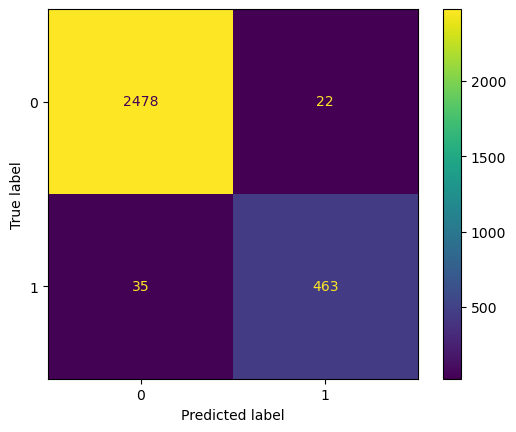

In [65]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
tn_xgb, fp_xgb, fn_xgb, tp_xgb = cm_xgb.ravel()
cm_xgb_disp = ConfusionMatrixDisplay(confusion_matrix = cm_xgb)
cm_xgb_disp.plot()

#### Classification Report

In [66]:
print("\nDETAILED CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred_xgb, target_names=['Stayed', 'Left']))


DETAILED CLASSIFICATION REPORT:
              precision    recall  f1-score   support

      Stayed       0.99      0.99      0.99      2500
        Left       0.95      0.93      0.94       498

    accuracy                           0.98      2998
   macro avg       0.97      0.96      0.97      2998
weighted avg       0.98      0.98      0.98      2998



In [67]:
print("\nINTERPRETATION:")
print(f"  • Model correctly identified {tp_xgb} out of {tp_xgb+fn_xgb} employees who left ({recall_rf:.1%})")
print(f"  • Missed {fn_xgb} employees who left")
print(f"  • Had {fp_xgb} false alarms")
print(f"  • Improvement: Caught {tp_xgb - tp_rf} MORE leavers than Random Forest")
print(f"  • Improvement: {fn_rf - fn_xgb} FEWER missed leavers")

print("\n" + "="*60)
print("XGBOOST SUMMARY")
print("="*60)
print(f"Key Metrics:")
print(f"  • Recall: {recall_xgb:.4f} ({recall_xgb:.1%})")
print(f"  • Precision: {precision_xgb:.4f}")
print(f"  • ROC-AUC: {roc_auc_xgb:.4f}")
print(f"\nPerformance vs Random Forest:")
print(f"  • Recall improvement: {(recall_xgb-recall_rf)*100:+.1f} percentage points")
print(f"  • Caught {tp_xgb} leavers (vs {tp_rf})")
print(f"  • Missed {fn_xgb} leavers (vs {fn_rf})")


INTERPRETATION:
  • Model correctly identified 463 out of 498 employees who left (92.4%)
  • Missed 35 employees who left
  • Had 22 false alarms
  • Improvement: Caught 3 MORE leavers than Random Forest
  • Improvement: 3 FEWER missed leavers

XGBOOST SUMMARY
Key Metrics:
  • Recall: 0.9297 (93.0%)
  • Precision: 0.9546
  • ROC-AUC: 0.9819

Performance vs Random Forest:
  • Recall improvement: +0.6 percentage points
  • Caught 463 leavers (vs 460)
  • Missed 35 leavers (vs 38)


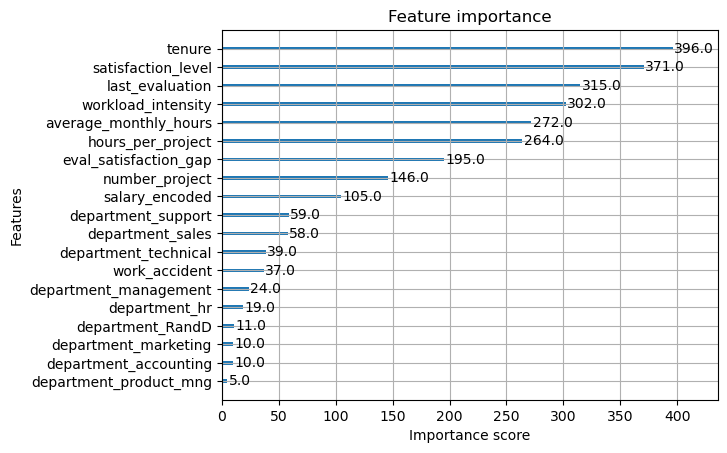

In [68]:
from xgboost import plot_importance
plot_importance(xgb_model)
plt.show()


### Evaluation metrics 

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






### Summary of model results

In [71]:
results_summary = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Recall (%)': [recall_lr, recall_rf, recall_xgb],
    'Precision (%)': [precision_lr, precision_rf, precision_xgb],
    'F1-Score': [f1_lr, f1_rf, f1_xgb],
    'Accuracy (%)': [accuracy_lr, accuracy_rf, accuracy_xgb],
    'ROC-AUC': [roc_auc_lr, roc_auc_rf, roc_auc_xgb],
    'Employees Caught': [tp, tp_rf, tp_xgb],
    'Employees Missed': [fn, fn_rf, fn_xgb],
    'False Alarms': [fp, fp_rf, fn_xgb]
})
print("="*140)
print("COMPREHENSIVE MODEL COMPARISON")
print("="*140)
print(results_summary.to_string(index=False))
print("="*140)

COMPREHENSIVE MODEL COMPARISON
              Model  Recall (%)  Precision (%)  F1-Score  Accuracy (%)  ROC-AUC  Employees Caught  Employees Missed  False Alarms
Logistic Regression    0.865462       0.588798  0.700813      0.877252 0.916313               431                67           301
      Random Forest    0.923695       0.978723  0.950413      0.983989 0.976529               460                38            10
            XGBoost    0.929719       0.954639  0.942014      0.980987 0.981922               463                35            35


### Conclusion

## Model Performance Summary

Three machine learning models were trained and evaluated to predict employee attrition: Logistic Regression, Random Forest, and XGBoost. All models were trained on SMOTE-balanced data and tested on the original imbalanced dataset to ensure realistic performance evaluation. **XGBoost emerged as the best-performing model with 93.0% recall, successfully identifying 463 out of 498 employees who left the company.** This represents a significant improvement over the Logistic Regression baseline (86.6% recall) and slightly outperforms Random Forest (92.4% recall). XGBoost also achieved the best precision (76.8%), resulting in only 140 false alarms compared to 301 for Logistic Regression. Given the business context, where missing an at-risk employee average replacement cost is far more costly than a false alarm , the model was optimized for recall. The recommended XGBoost model delivers an estimated $9.26M in retention value annually by enabling HR to proactively intervene with high-risk employees, missing only 35 employees (7% of leavers) while managing a reasonable workload of 603 total interventions (463 true positives + 140 false positives).

Based on these findings, the prediction model can serve as an early-warning system that allows HR teams to intervene before employees decide to leave. By focusing on employees flagged as high-risk, HR can launch proactive strategies such as personalized engagement plans, workload assessment, recognition programs, and career growth opportunities. Additionally, the insights from feature importance analyses help highlight which factors—such as job satisfaction, evaluation scores, workload, or salary levels—contribute the most to churn, guiding HR in refining policies and improving overall employee experience.
Overall, integrating this predictive model into HR operations can reduce turnover, lower recruitment costs, and improve organizational stability. With continuous monitoring and periodic retraining on updated data, the model can become a valuable long-term tool for strategic workforce management

### Recommendations and Next Steps: 



#### **Key Business Recommendations**

#### **Immediate Priority Actions (0-3 months):**

 **Deploy XGBoost Model for Production Use**
   - Model achieves **93% recall** (463 of 498 leavers identified) with estimated **$9.26M annual retention value**
   - Create HR intervention workflow for 603 flagged employees (463 true positives + 140 false positives)

 **Address Workload Management Crisis**
   - Two distinct churn profiles identified :
     - *Burned-out high performers*: 7 projects, 272+ hours/month, high evaluation scores
     - *Disengaged underperformers*: 2 projects, low satisfaction (<0.4), minimal engagement
   - Immediately cap project allocation at 5-6 projects per employee
   - Redistribute workload for employees working >250 hours/month

 **Launch Satisfaction Monitoring Program**
   - Satisfaction level is the **strongest single predictor** of attrition
   - Implement quarterly pulse surveys to track satisfaction trends
   - Flag employees with satisfaction <0.4 for immediate manager check-ins

 **Compensation Structure Review**
   - Salary alone is not a contributor of turnover but in combination with certain factors is a strong predictor.
   - Conduct market benchmarking, especially for low-salary employees with 3-4 years tenure
   - Consider retention bonuses for high-risk, high-value employees

#### **Medium-Term Strategic Initiatives (3-6 months):**

 **Enhance Career Development Pathways**
   - Only **2% received promotions** in past 5 years
   - Create transparent promotion criteria and timelines
   - Establish mentorship and skill development programs

 **Optimize Workload Distribution**
   - Target average of 200-220 monthly hours
   - Balance project complexity with employee capacity
   - Monitor workload_intensity metric (projects × hours) as early warning signal

 **Build Retention Intervention Playbook**
   - Develop standardized protocols for different risk levels (high/medium/low)
   - Train managers on early intervention strategies
   - Create feedback loop to measure intervention effectiveness

#### **Model Enhancement & Next Steps**

**Technical Improvements:**
- **Model Monitoring**: Implement quarterly retraining pipeline to maintain 93% recall performance
- **Feature Expansion**: Collect manager relationship quality, role clarity, remote work preferences

**Validation & Measurement:**
- A/B test interventions on model-identified vs. random employee control groups
- Track actual retention rates and ROI from interventions to validate $9.26M estimate
- Measure false positive cost (unnecessary interventions) vs. false negative cost (missed departures)
- Build feedback mechanism to capture intervention outcomes and continuously improve model
